In [36]:
# 라이브러리를 불러옵니다.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 데이터 추출
항우울제로 사용되는 약물들만 추출하도록 하겠습니다.

In [ ]:
# 데이터의 구조를 확인합니다.
data = pd.read_csv('국민건강보험공단_의약품처방정보_2017(1).CSV', encoding='cp949', nrows=5)
data

,기준년도,가입자일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
0,2017,1,340428,1,1,15,31,20170629,131801ATB,1.0,3,10,15.0,450,20181126
1,2017,1,340428,2,1,15,31,20170629,172101ATB,1.0,3,10,16.0,480,20181126
2,2017,1,340428,3,1,15,31,20170629,193302ATB,1.0,3,10,98.0,2940,20181126
3,2017,1,340428,4,1,15,31,20170629,133301ATB,1.0,3,10,54.0,1620,20181126
4,2017,1,340428,5,1,15,31,20170629,547100CCM,1.0,1,1,615.0,615,20181126


In [5]:
# 주성분코드 리스트를 읽어옵니다.
with open('ingredient_code.txt', 'r') as f:
    ingredient_code = f.read().splitlines()

In [ ]:
# 전체 파일에서 주성분코드 리스트에 있는 주성분코드가 포함된 행만 추출합니다.
rows = []
for chunk in pd.read_csv('국민건강보험공단_의약품처방정보_2017(1).CSV', encoding='cp949', chunksize=100000):
    rows.append(chunk[chunk['약품일반성분명코드'].isin(ingredient_code)])
for chunk in pd.read_csv('국민건강보험공단_의약품처방정보_2017(2).CSV', encoding='cp949', chunksize=100000):
    rows.append(chunk[chunk['약품일반성분명코드'].isin(ingredient_code)])
for chunk in pd.read_csv('국민건강보험공단_의약품처방정보_2017(3).CSV', encoding='cp949', chunksize=100000):
    rows.append(chunk[chunk['약품일반성분명코드'].isin(ingredient_code)])

# 추출한 행을 합칩니다.
df = pd.concat(rows)

In [ ]:
# 추출한 데이터를 CSV 파일로 저장합니다.
df.to_csv('anti_depressant_prescription.csv', index=False)

In [19]:
df.head()

,기준년도,가입자일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
2879,2017,62,7819529,2,1,12,41,20170711,242901ATB,2.0,1,28,40.0,2240,20181126
2909,2017,62,35429246,2,1,12,41,20170808,242901ATB,2.0,1,28,40.0,2240,20181126
2917,2017,62,37765102,5,1,12,41,20170609,242901ATB,2.0,1,28,40.0,2240,20181126
2938,2017,62,59976553,5,1,12,41,20170911,242901ATB,2.0,1,28,40.0,2240,20181126
4785,2017,107,21130660,1,1,11,47,20171017,495501ACE,1.0,1,30,404.0,12120,20181126


---
### EDA

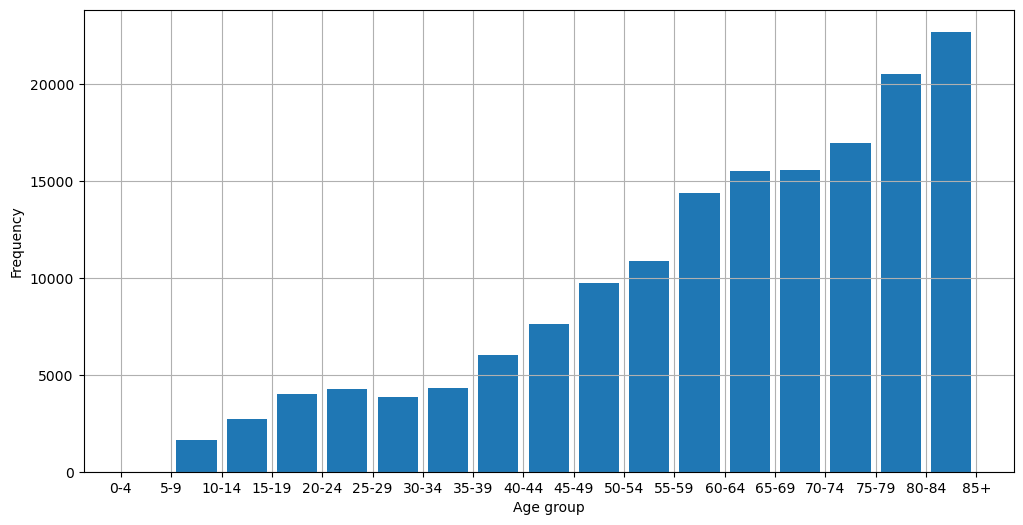

In [33]:
# 연령대코드(5세단위)를 그래프로 그립니다.
figure = plt.figure(figsize=(12, 6))
df['연령대코드(5세단위)'].hist(bins=range(1, 19), rwidth=0.8)
plt.xlabel('Age group')
plt.ylabel('Frequency')
plt.xticks(range(1, 19), ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85+'])
plt.show()

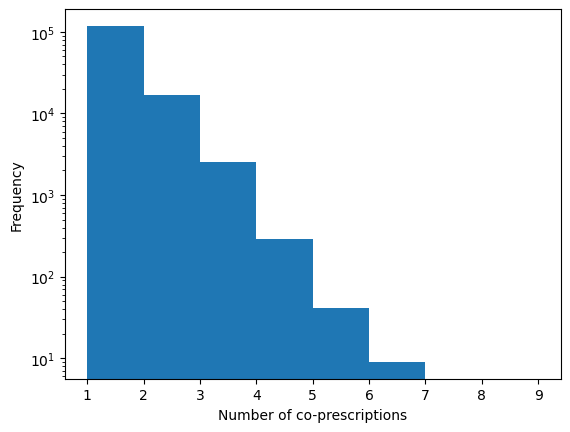

In [ ]:
# 처방내역일련번호으로 그룹화하여 같이 처방된 약품의 개수를 세어봅니다.
# 처방내역일련번호로 그룹화하여 처방된 약품의 개수를 세어봅니다.
prescription_counts = df.groupby('처방내역일련번호').size()



# 처방된 약품의 개수를 히스토그램으로 그립니다.
plt.hist(prescription_counts, bins=range(1, 10))
plt.xlabel('Number of co-prescriptions')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()